Nama : Bayu Abdurrosyid

Email : bayuuabdur2903@gmail.com

Alamat : Kalimantan Timur, Samarinda, Samarinda Ulu, Kel.Gunung Kelua, Jl.M.Yamin, gg.kasturi RT27

In [ ]:
#Mengimport Library yang dibutuhkan

from google.colab import files

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
import numpy as py

import os

In [ ]:
#Pengunduhan dan pengekstrakan dataset

!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

!unzip "/tmp/rockpaperscissors.zip" -d "/tmp"

dir = '/tmp/rockpaperscissors/rps-cv-images'

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /tmp/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /tmp/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /tmp/rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  

In [ ]:
#Augmentasi Gambar

datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.5,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.15,
    validation_split = 0.4
)

data_augmentation = keras.Sequential(
  [
    layers.RandomContrast(factor=0.2),
  ]
)

In [ ]:
#Pemisahan data train dan validation

panjang = 150
lebar = 150

train_dataset = datagen.flow_from_directory(
    dir,
    class_mode='categorical',
    subset = 'training',
    target_size = (panjang, lebar),
    batch_size = 32
)

validation_dataset = datagen.flow_from_directory(
    dir,
    class_mode='categorical',
    subset = 'validation',
    target_size = (panjang, lebar),
    batch_size = 32
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#Pemodelan CNN

model = Sequential(
    [
     layers.InputLayer(input_shape = (panjang, lebar, 3)),
     data_augmentation,
     layers.Conv2D(32, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Conv2D(64, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Conv2D(128, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Conv2D(256, (3, 3), activation='relu'),
     layers.MaxPooling2D(2, 2),
     layers.Dropout(0.2),
     layers.Flatten(),
     layers.Dense(512, activation = 'relu'),
     layers.Dense(3, activation = 'softmax')
    ]
)

In [ ]:
#Kompilasi Model

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#Ringkasan model

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)      

In [ ]:
#Pelatihan model

class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epocj, logs = None):
    if logs.get('accuracy') >= 0.96:
      self.model.stop_training = True

history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    validation_steps = 5,
    epochs = 30,
    verbose = 2,
    callbacks = [callback()]    
)

Epoch 1/30
42/42 - 13s - loss: 1.1433 - accuracy: 0.3250 - val_loss: 1.0967 - val_accuracy: 0.2750 - 13s/epoch - 301ms/step
Epoch 2/30
42/42 - 12s - loss: 1.0768 - accuracy: 0.4049 - val_loss: 0.9597 - val_accuracy: 0.5813 - 12s/epoch - 276ms/step
Epoch 3/30
42/42 - 11s - loss: 0.8242 - accuracy: 0.6195 - val_loss: 0.7715 - val_accuracy: 0.6562 - 11s/epoch - 273ms/step
Epoch 4/30
42/42 - 11s - loss: 0.6817 - accuracy: 0.7047 - val_loss: 0.8131 - val_accuracy: 0.6500 - 11s/epoch - 270ms/step
Epoch 5/30
42/42 - 11s - loss: 0.6724 - accuracy: 0.7154 - val_loss: 0.5654 - val_accuracy: 0.7625 - 11s/epoch - 267ms/step
Epoch 6/30
42/42 - 11s - loss: 0.6597 - accuracy: 0.7169 - val_loss: 0.6072 - val_accuracy: 0.7188 - 11s/epoch - 271ms/step
Epoch 7/30
42/42 - 11s - loss: 0.5547 - accuracy: 0.7763 - val_loss: 0.4814 - val_accuracy: 0.8188 - 11s/epoch - 274ms/step
Epoch 8/30
42/42 - 12s - loss: 0.4678 - accuracy: 0.8303 - val_loss: 0.3888 - val_accuracy: 0.8687 - 12s/epoch - 296ms/step
Epoch 9/

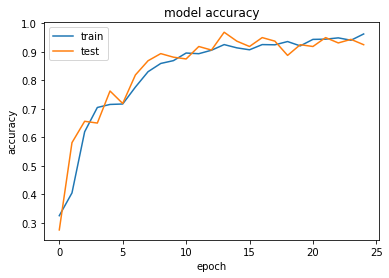

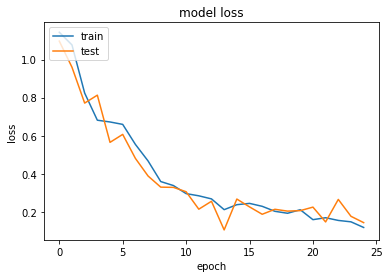

In [ ]:
# Grafik akurasi model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Grafik model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving sdfsdf.png to sdfsdf.png
Gunting


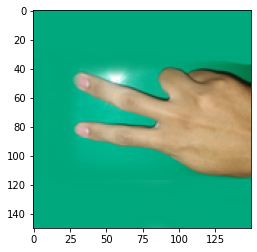

In [ ]:
#Penerapan melalui input dari pengguna

kelas = ["Kertas", "Batu", "Gunting"]

gambar = files.upload()

for dir in gambar.keys():

  img = image.load_img(dir, target_size = (panjang, lebar))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = py.expand_dims(x, axis = 0)

  img = utils.load_img(
      dir, target_size = (panjang, lebar)
  )

  img_array = utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print("{}" .format(kelas[py.argmax(score)]))
